In [121]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

/root/.cache/matplotlib


In [122]:
df=pd.read_csv("googleplaystore.csv")
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [123]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [124]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [125]:
def printinfo():
    temp = pd.DataFrame(index = df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [126]:
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [127]:
df['Type'].fillna("Free", inplace = True)
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [128]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [129]:
df.loc[10468:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up


In [130]:
df.dropna(subset = ['Content Rating'], inplace=True)
df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)
modeValueRating = df['Rating'].mode()
df['Rating'].fillna(value=modeValueRating[0], inplace = True)
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [131]:
df['Reviews'] = df.Reviews.astype(int)

df['Size'] = df.Size.apply(lambda x: x.strip('+'))
df['Size'] = df.Size.apply(lambda x: x.replace(',', ''))
df['Size'] = df.Size.apply(lambda x: x.replace('M', 'e+6'))
df['Size'] = df.Size.apply(lambda x: x.replace('k', 'e+3'))
df['Size'] = df.Size.replace('Varies with device', np.NaN)
df['Size'] = pd.to_numeric(df['Size']) 
df.dropna(subset = ['Size'], inplace=True)



df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))
df['Installs'] = df.Installs.apply(lambda x: x.replace(',', ''))
df['Installs'] = pd.to_numeric(df['Installs'])

printinfo()
#Converting columns with non numerical values to numerical values. Removing special characters.


,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [132]:
df['Price'].value_counts()

0          8421
$0.99       145
$2.99       114
$1.99        66
$4.99        65
           ... 
$15.46        1
$1.97         1
$19.90        1
$46.99        1
$400.00       1
Name: Price, Length: 87, dtype: int64

In [133]:
df['Price'] = df.Price.apply(lambda x: x.strip('$'))
df['Price'] = pd.to_numeric(df['Price'])
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


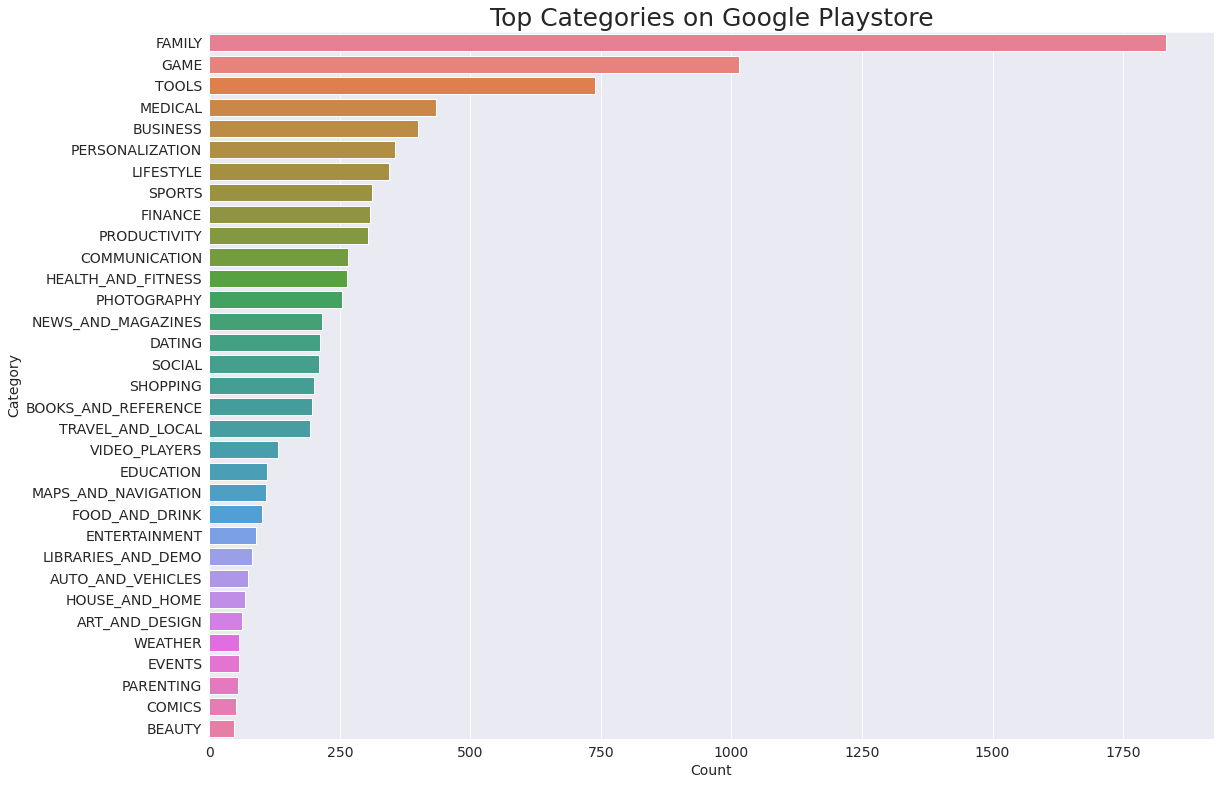

In [134]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

y = df['Category'].value_counts().index
x = df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top Categories on Google Playstore", fontsize = 25);

Out of the 33 categories of apps in the Google Play Store, **most** of the apps fall under the following categories:
1. Family
2. Game
3. Tools
Apps within the Beauty and Comics categories occur the **least**.


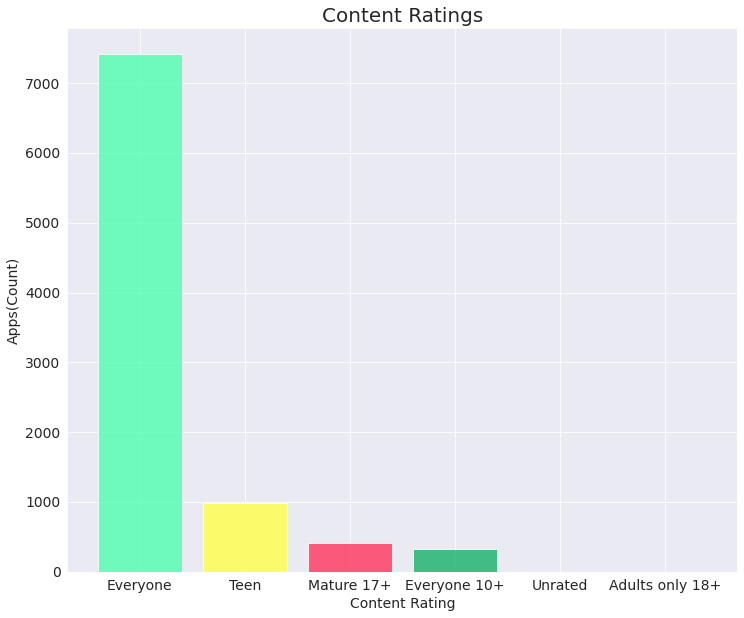

In [135]:
x2 = df['Content Rating'].value_counts().index
y2 = df['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#4FFFB0','#FFFF48','#ff355e','#17B169','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Ratings',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

From the above plot, we can see that most of the apps in the Google Play Store are appropriate for **Everyone**.

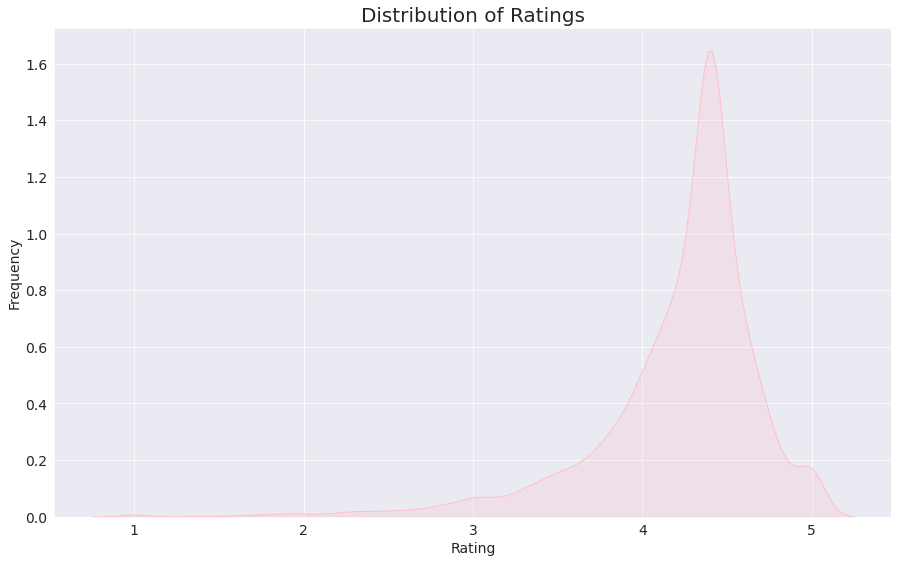

In [136]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="pink", shade = True)
plt.title('Distribution of Ratings',size = 20);

Most of the apps in the Google Play Store are rated between 3.5 to 4.8 out of 5.



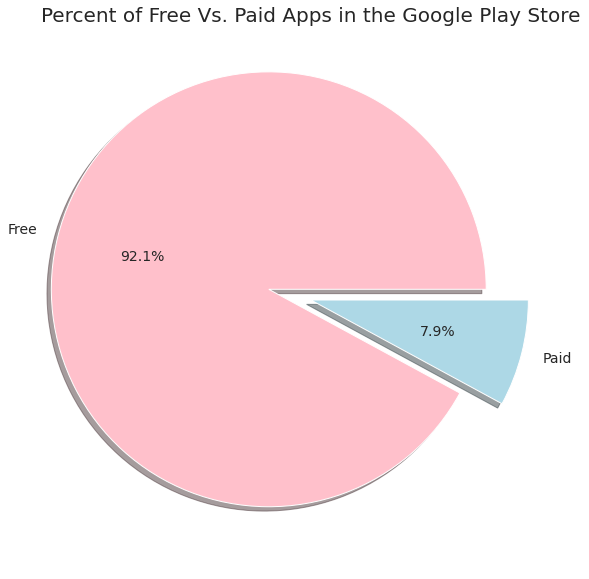

In [137]:
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["pink","lightblue"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs. Paid Apps in the Google Play Store',size = 20)
plt.show()

92.1% of the apps in the Google Play Store are **free**, and 7.9% are **paid**.

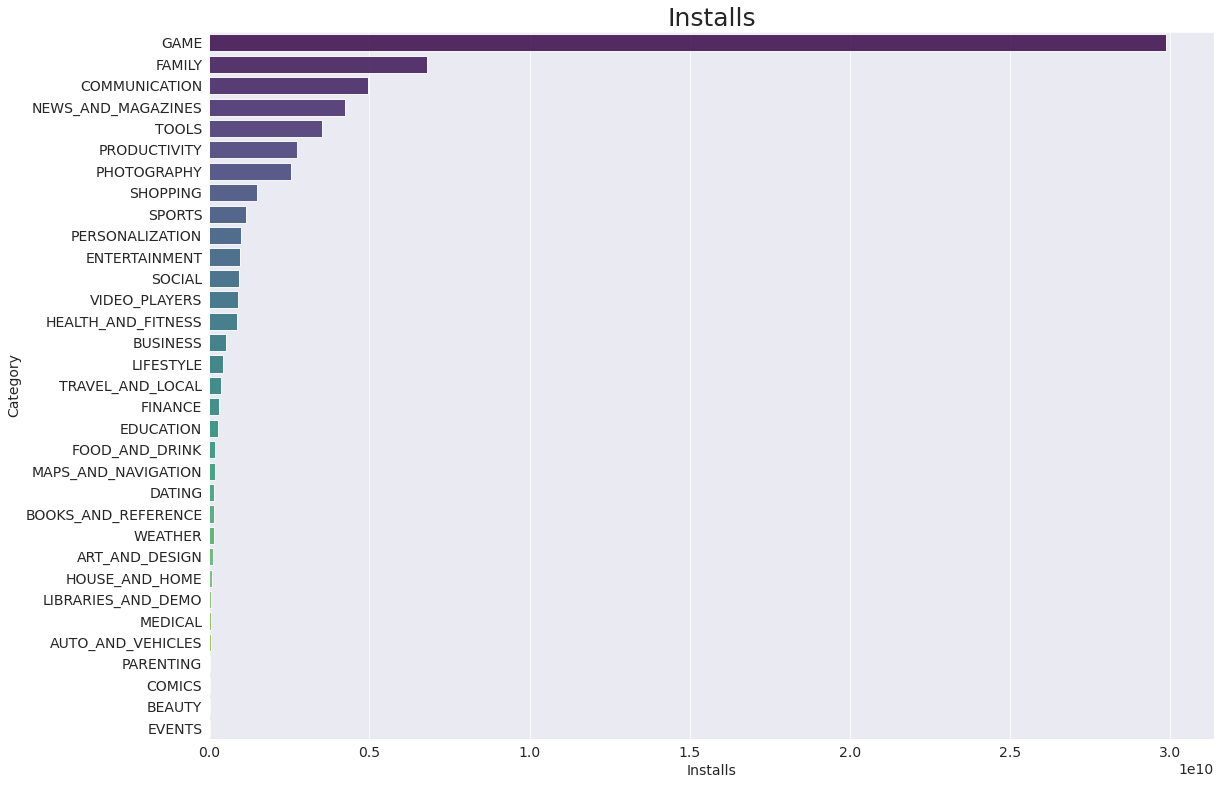

In [138]:
highest_Installs_df = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

The following categories have the **highest number** of installs:
1.  Game
2. Family
3. Communication
4. News & Magazines
5. Tools.

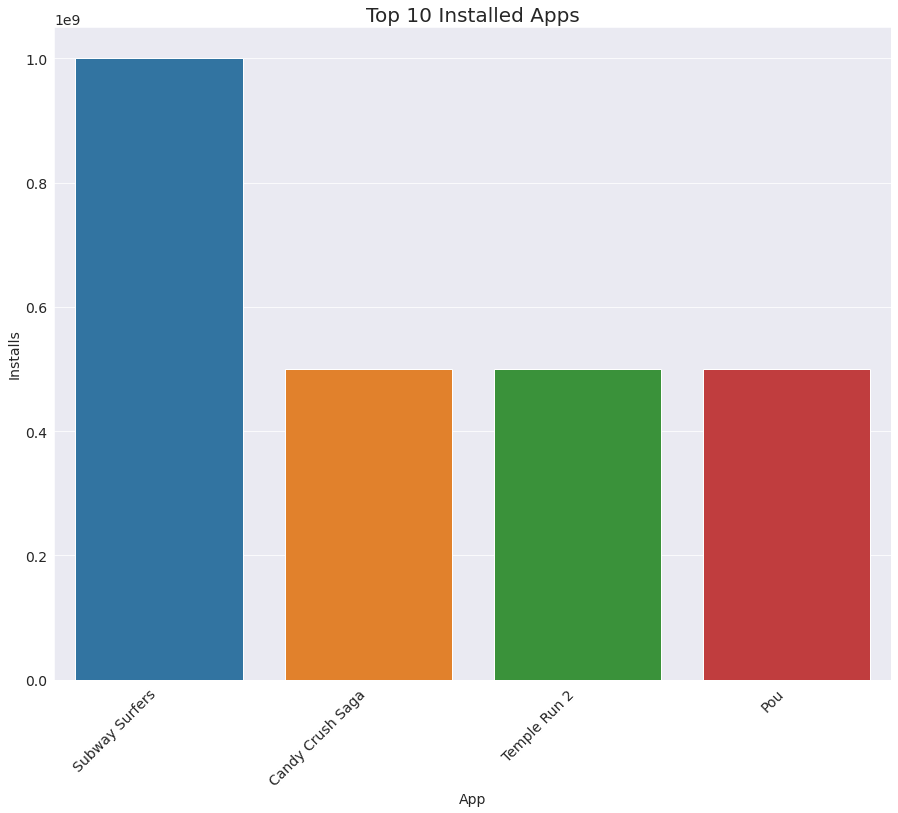

In [139]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df[df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');
    
findtop10incategory('Game')

In the Google Play Store category with the most app installs, **Game**; Subway Surfers and Candy Crush Saga are the apps that have the highest installs.

In [140]:
Apps_with_Highest_rev = df.sort_values(by='Reviews', ascending=False).head(20)
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1879,Clash of Clans,GAME,4.6,44893888,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1704,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1670,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
3986,Clash of Clans,FAMILY,4.6,44881447,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1917,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1750,Subway Surfers,GAME,4.5,27724094,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1700,Subway Surfers,GAME,4.5,27723193,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
3896,Subway Surfers,GAME,4.5,27711703,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade


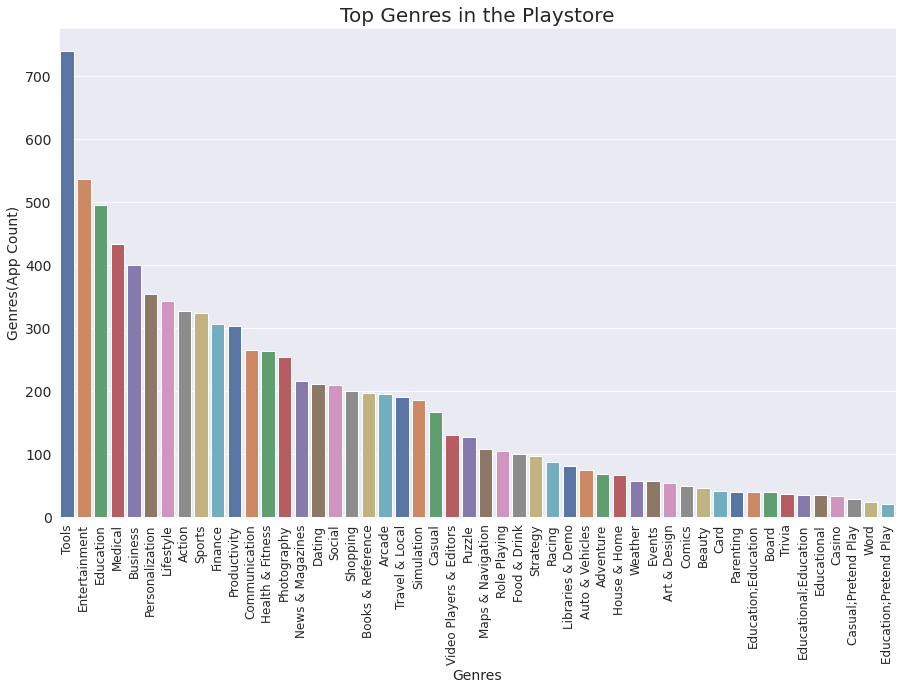

In [141]:
topAppsinGenres = df['Genres'].value_counts().head(50)
x3sis = []
y3sis = []

for i in range(len(topAppsinGenres)):
    x3sis.append(topAppsinGenres.index[i])
    y3sis.append(topAppsinGenres[i])

plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);


From the visualization above, we can see that the Highest Number of Apps can be found in the **Tools** and **Entertainment** genres, followed closely by **Education**, **Medical** and **Business**.

In [ ]:
Paid_Apps_df = df[df['Type'] == 'Paid']
earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price'];
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


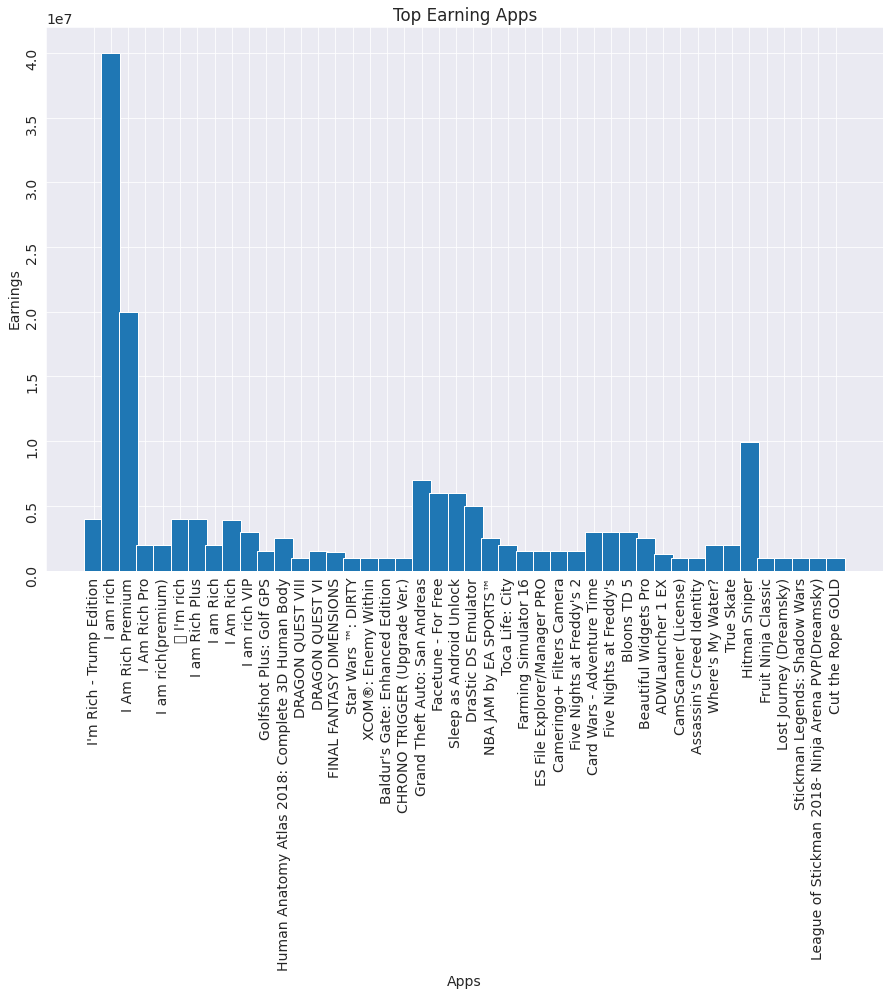

In [150]:
plt.figure(figsize=(15,10))
plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Earnings, width=1.1, label=earning_df_sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");


The **top five apps** with the **highest earnings** found on the Google Play Store are:
1. I am Rich
2. I am Rich Premium
3. Hitman Sniper
4. Grand Theft Auto: San Andreas
5. Facetune - For Free


I am Rich Premium
Hitman Sniper
Grand Theft Auto: San Andreas
Facetune - For Free